In [10]:
import pandas as pd
import matplotlib.pyplot as plt


#### Phase 2.1: Start Cleaning Dataset 1 (MCX India Price)

In [ ]:
df1 = pd.read_csv("Dataset/1_Gold Price.csv")  ## Load Dataset 1 

In [8]:
# Convert Date to datetime
df1['Date'] = pd.to_datetime(df1['Date'])

# Sort rows by Date
df1 = df1.sort_values('Date').reset_index(drop=True)

# Clean Chg% column -> remove % sign
df1['Chg%'] = df1['Chg%'].astype(str).str.replace('%', '', regex=False)
df1['Chg%'] = pd.to_numeric(df1['Chg%'], errors='coerce')

df1.head()


,Date,Price,Open,High,Low,Volume,Chg%
0,2014-01-01,29542,29435,29598,29340,2930,0.25
1,2014-01-02,29975,29678,30050,29678,3140,1.47
2,2014-01-03,29727,30031,30125,29539,3050,-0.83
3,2014-01-04,29279,29279,29279,29279,0,-1.51
4,2014-01-06,29119,29300,29395,29051,24380,-0.55


In [9]:
df1.info()
df1.describe()
df1.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2848 non-null   datetime64[ns]
 1   Price   2848 non-null   int64         
 2   Open    2848 non-null   int64         
 3   High    2848 non-null   int64         
 4   Low     2848 non-null   int64         
 5   Volume  2848 non-null   int64         
 6   Chg%    2848 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 155.9 KB


Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
Chg%      0
dtype: int64

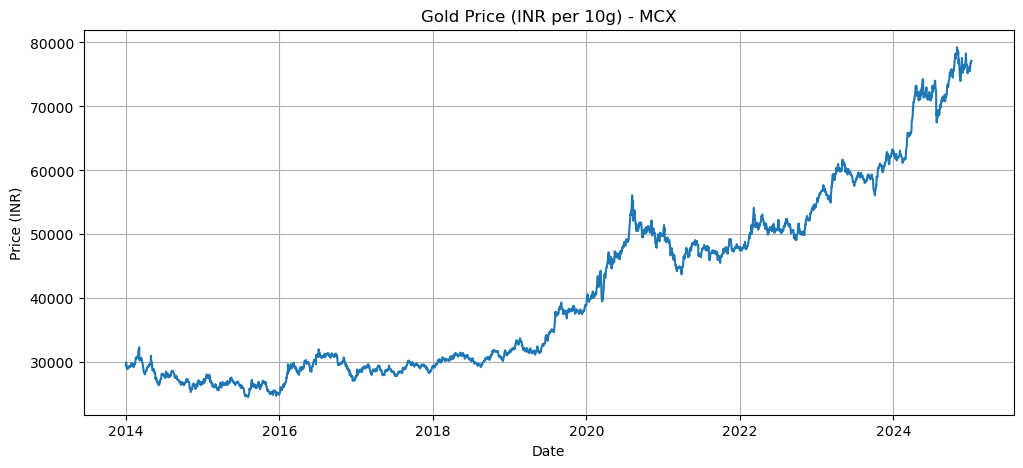

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df1['Date'], df1['Price'])
plt.title("Gold Price (INR per 10g) - MCX")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()


#### PHASE 2.2 — Clean Dataset 3 (1978–2023 WGC Data)

In [13]:
df3 = pd.read_csv("Dataset/dataset_2_1978–2023/Daily.csv")
df3.head()

,Date,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
0,12/29/1978,226.0,137.1,NaN,110.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/1979,226.0,137.1,NaN,110.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/2/1979,226.8,137.3,"43,164.9",111.5,263.7,359.6,"1,792.9",NaN,NaN,735.6,"138,160.5",851.3,"4,454.6",NaN,NaN,"107,470.0",NaN,194.6,193.6
3,1/3/1979,218.6,134.0,"43,717.9",108.0,264.4,365.9,"1,802.2",NaN,NaN,739.4,"138,877.0",855.7,"4,477.7",NaN,NaN,"108,027.4",NaN,192.2,193.0
4,1/4/1979,223.2,136.8,"43,674.9",110.7,264.1,366.4,"1,811.7",NaN,NaN,743.4,"139,616.3",860.3,"4,501.5",NaN,NaN,"108,602.5",NaN,193.0,194.6


In [14]:
# Convert Date to datetime
df3['Date'] = pd.to_datetime(df3['Date'])

# Sort by Date
df3 = df3.sort_values('Date').reset_index(drop=True)

df3.head()


,Date,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
0,1978-12-29,226.0,137.1,NaN,110.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1979-01-01,226.0,137.1,NaN,110.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1979-01-02,226.8,137.3,"43,164.9",111.5,263.7,359.6,"1,792.9",NaN,NaN,735.6,"138,160.5",851.3,"4,454.6",NaN,NaN,"107,470.0",NaN,194.6,193.6
3,1979-01-03,218.6,134.0,"43,717.9",108.0,264.4,365.9,"1,802.2",NaN,NaN,739.4,"138,877.0",855.7,"4,477.7",NaN,NaN,"108,027.4",NaN,192.2,193.0
4,1979-01-04,223.2,136.8,"43,674.9",110.7,264.1,366.4,"1,811.7",NaN,NaN,743.4,"139,616.3",860.3,"4,501.5",NaN,NaN,"108,602.5",NaN,193.0,194.6


In [15]:
# Keep only the Date and INR columns
df_inr = df3[['Date', 'INR']].copy()

df_inr.head()


,Date,INR
0,1978-12-29,NaN
1,1979-01-01,NaN
2,1979-01-02,"1,792.9"
3,1979-01-03,"1,802.2"
4,1979-01-04,"1,811.7"


In [17]:
# Convert INR column to numeric by removing commas and invalid values
df_inr['INR'] = df_inr['INR'].astype(str).str.replace(',', '', regex=False)

# Convert to numeric, forcing invalid strings to NaN
df_inr['INR'] = pd.to_numeric(df_inr['INR'], errors='coerce')

df_inr[['Date', 'INR']].head()


,Date,INR
0,1978-12-29,NaN
1,1979-01-01,NaN
2,1979-01-02,1792.9
3,1979-01-03,1802.2
4,1979-01-04,1811.7


In [18]:
# Convert INR per ounce to INR per gram
df_inr['INR_per_gram'] = df_inr['INR'] / 31.1035

# Convert to INR per 10 grams (Rupeek standard)
df_inr['INR_per_10g'] = df_inr['INR_per_gram'] * 10

df_inr.head()


,Date,INR,INR_per_gram,INR_per_10g
0,1978-12-29,NaN,NaN,NaN
1,1979-01-01,NaN,NaN,NaN
2,1979-01-02,1792.9,57.643031,576.430305
3,1979-01-03,1802.2,57.942032,579.420322
4,1979-01-04,1811.7,58.247464,582.474641


In [20]:
df_inr.isna().sum()
df_inr = df_inr.fillna(method='ffill')


C:\Users\brahm\AppData\Local\Temp\ipykernel_16092\880004094.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_inr = df_inr.fillna(method='ffill')


In [24]:
df_inr['INR_per_10g'] = df_inr['INR_per_10g'].fillna(method='ffill')
df_inr


C:\Users\brahm\AppData\Local\Temp\ipykernel_16092\3492580373.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_inr['INR_per_10g'] = df_inr['INR_per_10g'].fillna(method='ffill')


,Date,INR,INR_per_gram,INR_per_10g
0,1978-12-29,NaN,NaN,NaN
1,1979-01-01,NaN,NaN,NaN
2,1979-01-02,1792.9,57.643031,576.430305
3,1979-01-03,1802.2,57.942032,579.420322
4,1979-01-04,1811.7,58.247464,582.474641
...,...,...,...,...
11621,2023-07-17,159940.3,5142.196216,51421.962159
11622,2023-07-18,162067.1,5210.574373,52105.743727
11623,2023-07-19,162141.7,5212.972817,52129.728166
11624,2023-07-20,162159.4,5213.541884,52135.418844


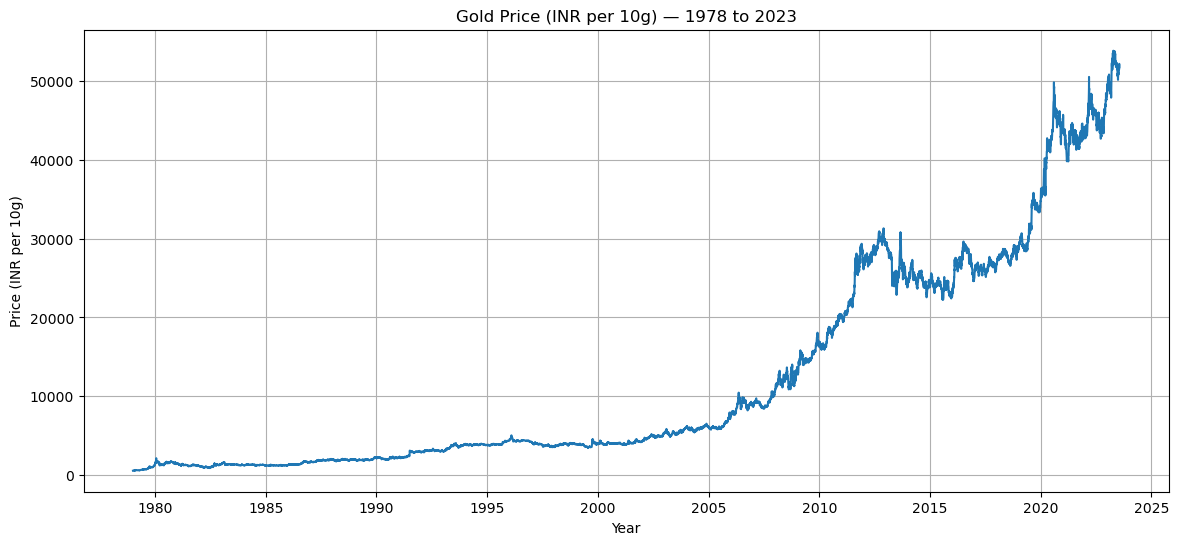

In [22]:
plt.figure(figsize=(14,6))
plt.plot(df_inr['Date'], df_inr['INR_per_10g'])
plt.title("Gold Price (INR per 10g) — 1978 to 2023")
plt.xlabel("Year")
plt.ylabel("Price (INR per 10g)")
plt.grid(True)
plt.show()


#### PHASE 3 — Merge Dataset 1 (MCX Actual Prices) + Dataset 3 (Historical Prices)

In [25]:
# Keep only Date and Price columns from Dataset 1
df1_clean = df1[['Date', 'Price']].copy()
df1_clean = df1_clean.rename(columns={'Price': 'Price_10g'})
df1_clean.head()


,Date,Price_10g
0,2014-01-01,29542
1,2014-01-02,29975
2,2014-01-03,29727
3,2014-01-04,29279
4,2014-01-06,29119


In [26]:
# Keep only Date and INR_per_10g columns
df3_clean = df_inr[['Date', 'INR_per_10g']].copy()
df3_clean = df3_clean.rename(columns={'INR_per_10g': 'Price_10g'})
df3_clean.head()


,Date,Price_10g
0,1978-12-29,NaN
1,1979-01-01,NaN
2,1979-01-02,576.430305
3,1979-01-03,579.420322
4,1979-01-04,582.474641


In [27]:
# Merge both datasets using an outer join
merged = pd.merge(df3_clean, df1_clean, on='Date', how='outer', suffixes=('_hist', '_mcx'))

merged.head(20)


,Date,Price_10g_hist,Price_10g_mcx
0,1978-12-29,NaN,NaN
1,1979-01-01,NaN,NaN
2,1979-01-02,576.430305,NaN
3,1979-01-03,579.420322,NaN
4,1979-01-04,582.474641,NaN
5,1979-01-05,592.730722,NaN
6,1979-01-08,591.991255,NaN
7,1979-01-09,585.946919,NaN
8,1979-01-10,579.838282,NaN
9,1979-01-11,583.407012,NaN


In [28]:
merged['Gold_Price'] = merged['Price_10g_mcx'].combine_first(merged['Price_10g_hist'])


In [29]:
# Sort by date
merged = merged.sort_values('Date').reset_index(drop=True)

# Forward-fill missing values
merged['Gold_Price'] = merged['Gold_Price'].fillna(method='ffill')


C:\Users\brahm\AppData\Local\Temp\ipykernel_16092\942082458.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged['Gold_Price'] = merged['Gold_Price'].fillna(method='ffill')


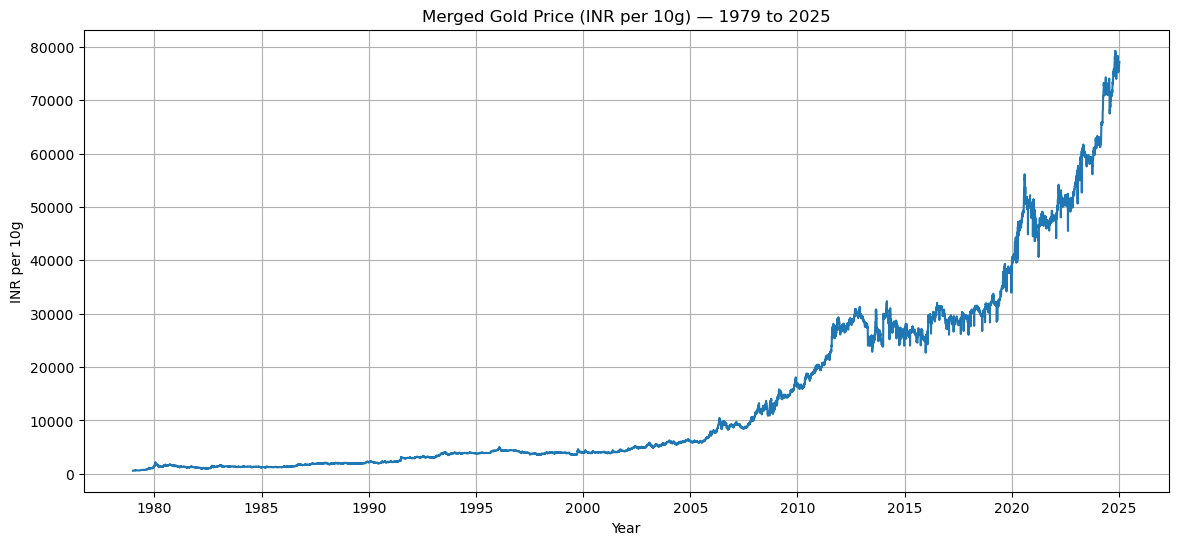

In [30]:
plt.figure(figsize=(14,6))
plt.plot(merged['Date'], merged['Gold_Price'])
plt.title("Merged Gold Price (INR per 10g) — 1979 to 2025")
plt.xlabel("Year")
plt.ylabel("INR per 10g")
plt.grid(True)
plt.show()


#### PHASE 4 — Time Series Forecasting (Prophet / ARIMA)